# Project_2

## Regression

### Part A Linear Regression

Description:
We will try to predict "adiposity" which refers to the body fat percentage.
We choose this because we have indicators that the other attributes will be able to predict it (check correlations-> high numbers).
Also, it follows a normal distribution so we will not have troubles with that.

In [70]:
%matplotlib inline
#%matplotlib widget

In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [72]:
data = pd.read_csv('https://hastie.su.domains/ElemStatLearn/datasets/SAheart.data?fbclid=IwAR0bnadUy7l7_jwPgJzAW1Dg5RM_JyAKv_doOWxuP2Fx2XpkTAliWHRl73U') 

#### Data cleaning

In [73]:
# drop unnecessary name variable
data.drop(columns = 'row.names',inplace=True)
# one hot enc of categorical variable famhist
df_famhist = pd.get_dummies(data['famhist'],prefix="famhist")
data.drop(columns = 'famhist',inplace=True)
data = pd.concat([data, df_famhist], axis=1)
# !!!! In case we include chd we are going to one hot encode that too!
print(data.columns)

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol',
       'age', 'chd', 'famhist_Absent', 'famhist_Present'],
      dtype='object')


In [74]:
X = data.iloc[:,[0,1,2,4,5,6,7,8,9,10]]
X_data_columns = X.columns
y = data.iloc[:,[3]]

##### Standardize the data (mean=0, std=1)

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
X = StandardScaler().fit_transform(X)
#X = X.to_numpy()
y = y.to_numpy()

In [77]:
#### Model


In [78]:
##### Cross validation

In [79]:
from sklearn import model_selection

In [80]:
K = 10
CV = model_selection.KFold(K, shuffle=True)

In [81]:
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge  # it's linear regression with l2 regularization
#from sklearn.linear_model import RidgeCV  # it's linear regression with l2 regularization CV stands for cross validation
import numpy as np
from sklearn.metrics import mean_squared_error

In [85]:
generalization_err_per_model = {}
training_err_per_model = {}
lambdas = np.power(10.,range(-5,9))
lambdas= np.append(lambdas,[2,4,6,8])
lambdas = np.sort(lambdas)

for lambda_value in lambdas:
    generalization_err_per_model[lambda_value]=[]
    training_err_per_model[lambda_value]=[]

for train_index, test_index in CV.split(X,y):
    # extract training and test set for current CV fold
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for lambda_value in lambdas:
        reg = Ridge(alpha=lambda_value)
        reg.fit(X_train, y_train)
        
        y_pred = reg.predict(X_test)
        generalization_err = mean_squared_error(y_test, y_pred, squared=True)
        generalization_err_per_model[lambda_value].append(generalization_err)

        y_pred = reg.predict(X_train)
        training_err = mean_squared_error(y_train, y_pred, squared=True)
        training_err_per_model[lambda_value].append(mean_squared_error(y_train, y_pred, squared=True))


avg_generalization_err_per_lambda_value = {}
for lambda_value, errors in generalization_err_per_model.items():
    avg_generalization_err_per_lambda_value[lambda_value] = sum(errors)/len(errors)
avg_generalization_err_per_lambda_value = list(avg_generalization_err_per_lambda_value.values())

avg_training_err_per_lambda_value = {}
for lambda_value, errors in training_err_per_model.items():
    avg_training_err_per_lambda_value[lambda_value] = sum(errors)/len(errors)
avg_training_err_per_lambda_value = list(avg_training_err_per_lambda_value.values())


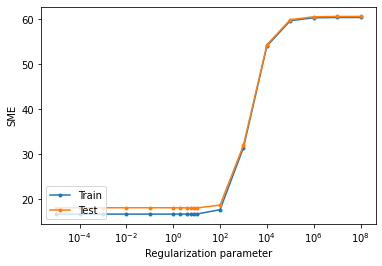

In [86]:
import matplotlib.pyplot as plt

plt.semilogx(lambdas, avg_training_err_per_lambda_value, label="Train", marker = ".")
plt.semilogx(lambdas, avg_generalization_err_per_lambda_value, label="Test", marker = "." )
plt.legend(loc="lower left")
plt.xlabel("Regularization parameter")
plt.ylabel("SME")
plt.show()


Below he have the coefficients of the attriutes that we are using.
Keep in mind if you see an extra coef then it is just the interecept that I might decided to include.

In [87]:
reg = Ridge(alpha=1.0)
reg.fit(X_train, y_train)
print(reg.coef_[0])
print(list(X_data_columns))

[ 3.24410208e-01  1.04446881e-03  1.08872056e+00 -4.48471777e-01
  4.28695994e+00  2.64478750e-01  3.07071380e+00  1.32762276e-01
 -1.52448212e-02  1.52448212e-02]
['sbp', 'tobacco', 'ldl', 'typea', 'obesity', 'alcohol', 'age', 'chd', 'famhist_Absent', 'famhist_Present']
